# Exercise 1. 

# Exercise 2. 

# Exercise 3. 

# Exercise 4. 

The data file hours contains monthly values of the average hours worked per
week in the U.S. manufacturing sector for July 1982 through June 1987.

(a) Display and interpret the time series plot for these data.

In [2]:
library(TSA)
data(hours)
hours


Attaching package: ‘TSA’


The following objects are masked from ‘package:stats’:

    acf, arima


The following object is masked from ‘package:utils’:

    tar




,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1982,,,,,,,38.9,39.0,38.9,39.0,39.3,39.7
1983,39.2,38.8,39.6,39.8,39.9,40.3,40.0,40.2,40.8,40.7,40.8,41.2
1984,40.6,40.7,40.7,40.9,40.6,40.8,40.3,40.4,40.7,40.5,40.7,41.2
1985,40.3,39.7,40.4,40.1,40.3,40.6,40.1,40.5,40.8,40.8,40.9,41.7
1986,40.7,40.3,40.7,40.5,40.6,40.8,40.2,40.7,41.0,40.7,41.0,41.5
1987,40.8,40.8,40.9,40.4,40.9,41.1,,,,,,


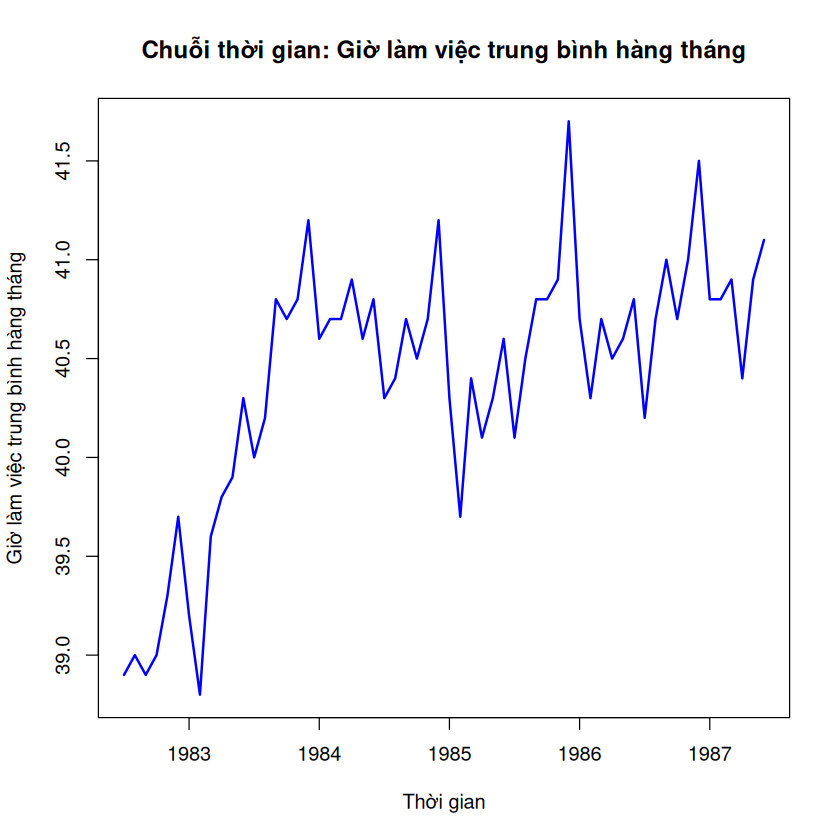

In [4]:
# Vẽ biểu đồ chuỗi thời gian
plot(hours,
    main = "Chuỗi thời gian: Giờ làm việc trung bình hàng tháng",
    ylab = "Giờ làm việc trung bình hàng tháng", xlab = "Thời gian", col = "blue", lwd = 2
)

Thoi gian lam viec trung binh qua cac nam tang.  


(b) Now construct a time series plot that uses separate plotting symbols for the
various months. Does your interpretation change from that in part (a)?

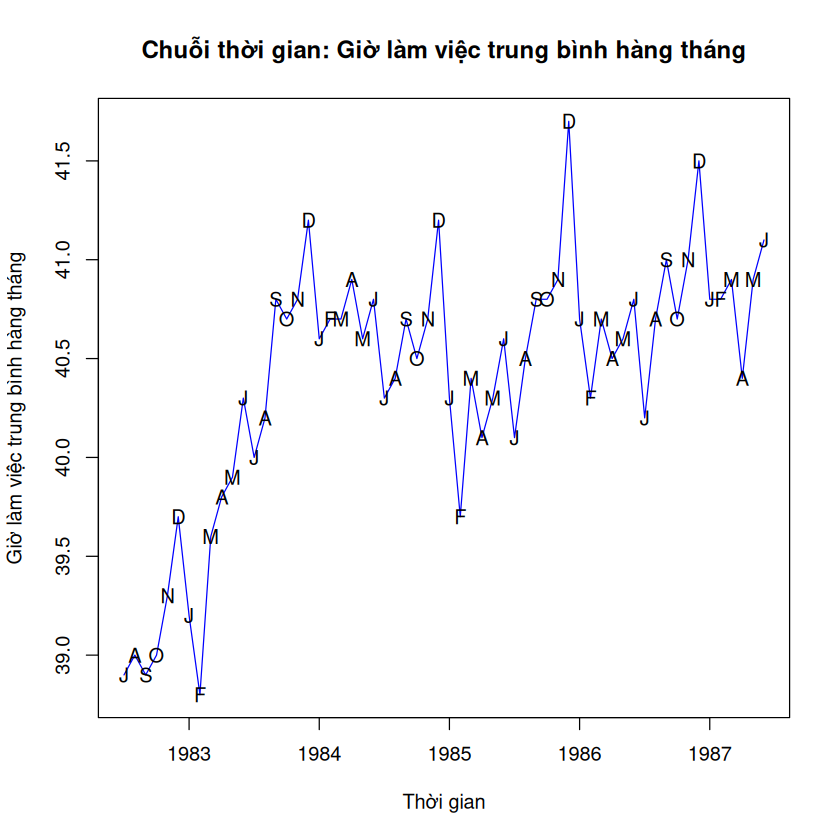

In [10]:
plot(hours,
    main = "Chuỗi thời gian: Giờ làm việc trung bình hàng tháng",
    ylab = "Giờ làm việc trung bình hàng tháng", xlab = "Thời gian", col = "blue", lwd = 1, type = "l"
)
q <- season(hours)
points(y = hours, x = time(hours), pch = as.vector(q))


Thang 12 luon lam viec nhieu.  
Thang 1, 2 thuong lam viec it hon.  

# Exercise 5. 

# Exercise 6. 

The data file beersales contains monthly U.S. beer sales (in millions of barrels)
for the period January 1975 through December 1990.

(a) Display and interpret the plot the time series plot for these data.

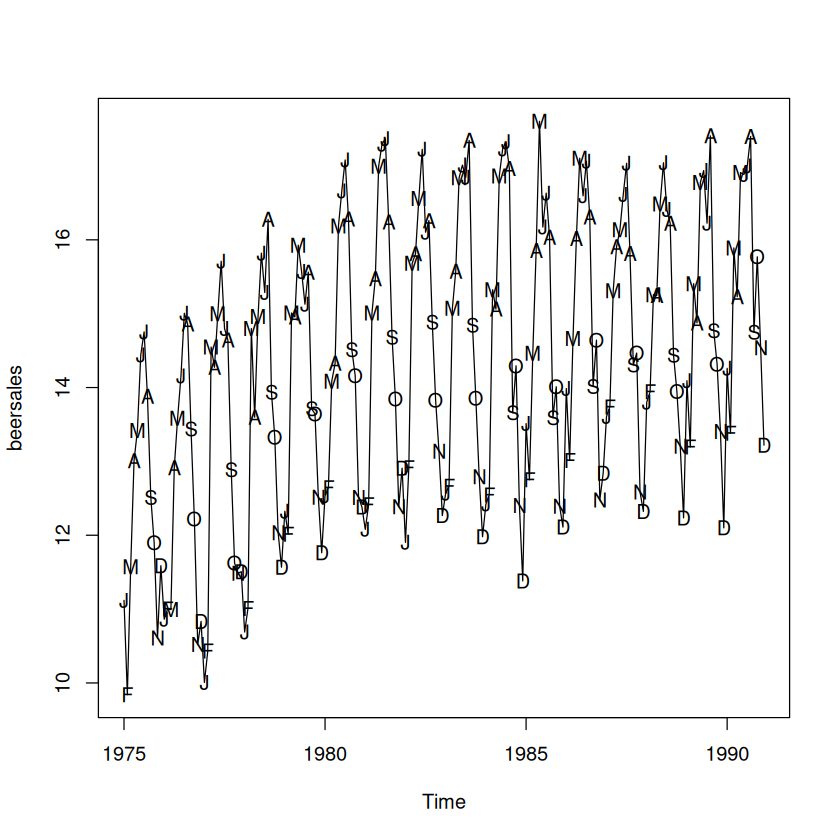

In [3]:
data("beersales")
plot(beersales, type='l')
points(y = beersales, x= time(beersales), pch = as.vector(season(beersales))) 

(b) Now construct a time series plot that uses separate plotting symbols for the
various months. Does your interpretation change from that in part (a)?

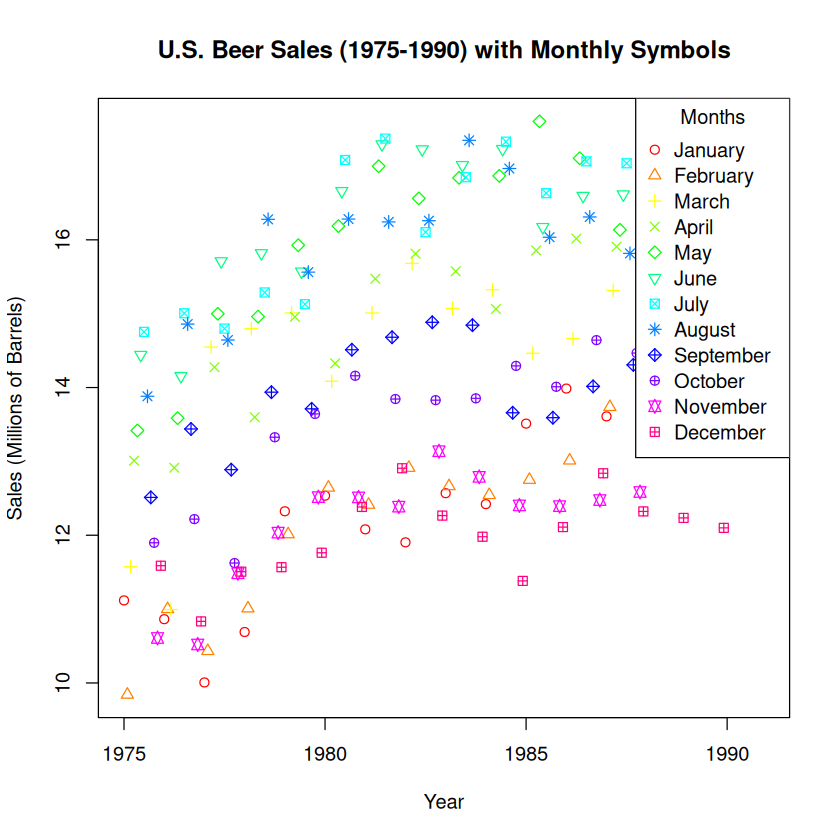

In [5]:
# Chuyển dữ liệu thành chuỗi thời gian
beer_ts <- beersales

# Vẽ đồ thị chuỗi thời gian
# plot(beer_ts, main = "U.S. Beer Sales (1975-1990)", ylab = "Sales (Millions of Barrels)", xlab = "Year")

# Thiết lập màu sắc và ký hiệu khác nhau cho từng tháng
months <- cycle(beer_ts)
colors <- rainbow(12)  # Sử dụng màu cầu vồng cho mỗi tháng
symbols <- 1:12  # Ký hiệu khác nhau cho mỗi tháng

# Vẽ biểu đồ chuỗi thời gian với ký hiệu khác nhau cho mỗi tháng
plot(beer_ts, type = "n", main = "U.S. Beer Sales (1975-1990) with Monthly Symbols",
     ylab = "Sales (Millions of Barrels)", xlab = "Year")

# Vẽ dữ liệu với các ký hiệu và màu khác nhau
for (i in 1:12) {
  points(time(beer_ts)[months == i], beer_ts[months == i], col = colors[i], pch = symbols[i])
}

legend("topright", legend = month.name, col = colors, pch = symbols, title = "Months")


(c) Use least squares to fit a seasonal-means trend to this time series. Interpret the
regression output. Save the standardized residuals from the fit for further anal-
ysis.


Call:
lm(formula = beer_ts ~ time(beer_ts) + month_factors)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.48079 -0.51087 -0.02031  0.51483  1.36815 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -321.08736   21.40019 -15.004  < 2e-16 ***
time(beer_ts)      0.16826    0.01079  15.588  < 2e-16 ***
month_factors2    -0.15662    0.24377  -0.642    0.521    
month_factors3     2.05415    0.24377   8.426 1.14e-14 ***
month_factors4     2.35554    0.24378   9.662  < 2e-16 ***
month_factors5     3.54288    0.24379  14.532  < 2e-16 ***
month_factors6     3.77965    0.24381  15.503  < 2e-16 ***
month_factors7     3.68453    0.24383  15.111  < 2e-16 ***
month_factors8     3.51062    0.24385  14.397  < 2e-16 ***
month_factors9     1.46065    0.24387   5.989 1.13e-08 ***
month_factors10    1.12825    0.24390   4.626 7.13e-06 ***
month_factors11   -0.18818    0.24393  -0.771    0.441    
month_factors12   -0.57732    0.24397  -2.366    0.01

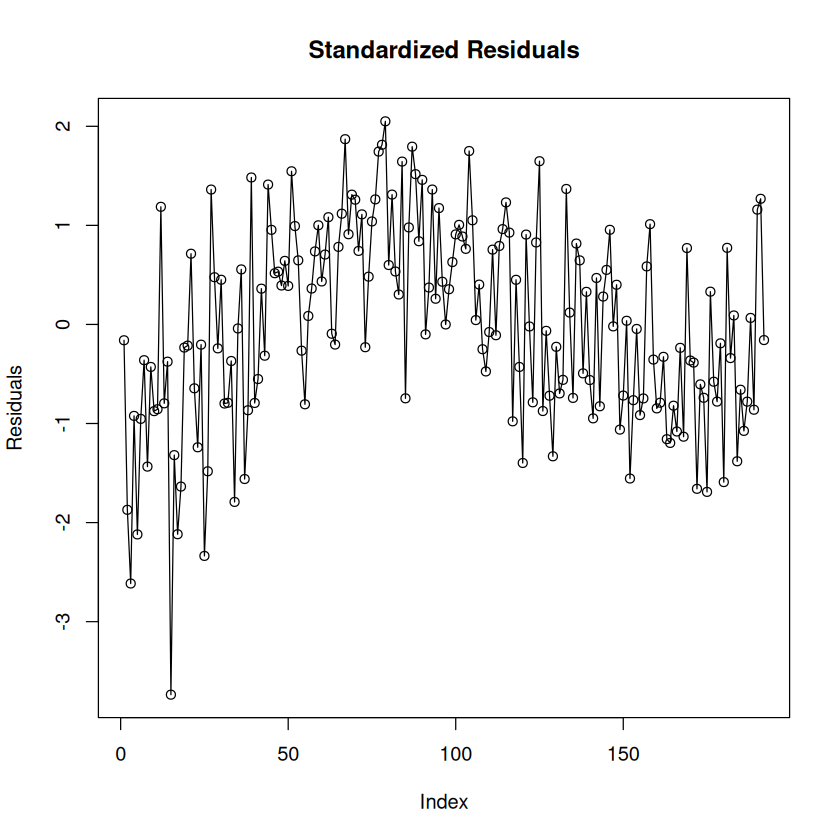

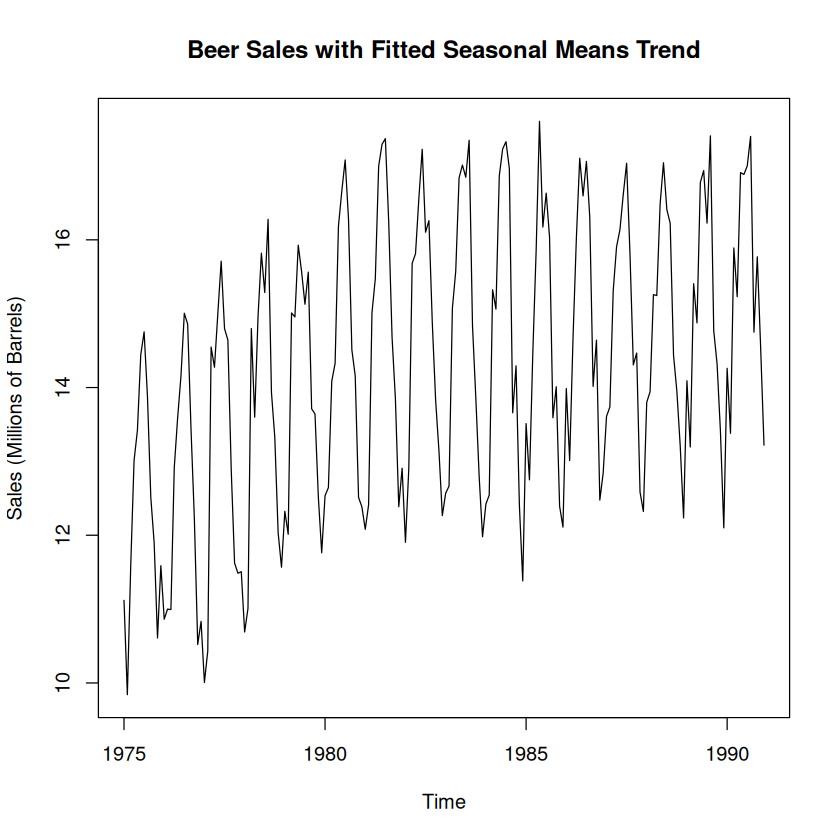

In [6]:
# Sử dụng chỉ số tháng dưới dạng yếu tố để mô hình hoá theo mùa
month_factors <- factor(months)

# Sử dụng hồi quy tuyến tính với chỉ số tháng
fit <- lm(beer_ts ~ time(beer_ts) + month_factors)

# Tóm tắt kết quả hồi quy
summary(fit)

# Lưu residuals chuẩn hóa
standardized_residuals <- rstandard(fit)

# Vẽ residuals để kiểm tra sự phù hợp của mô hình
plot(standardized_residuals, type = "o", main = "Standardized Residuals", ylab = "Residuals")

# Vẽ lại dữ liệu và trend đã fit
plot(beer_ts, main = "Beer Sales with Fitted Seasonal Means Trend", ylab = "Sales (Millions of Barrels)")
lines(fitted(fit), col = "blue", lwd = 2)


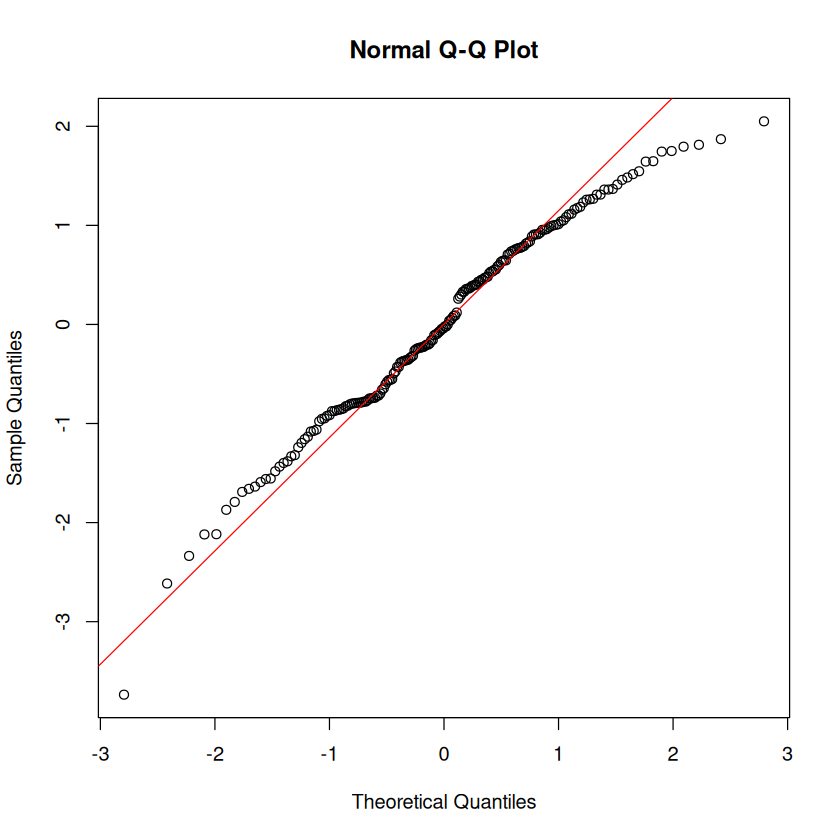

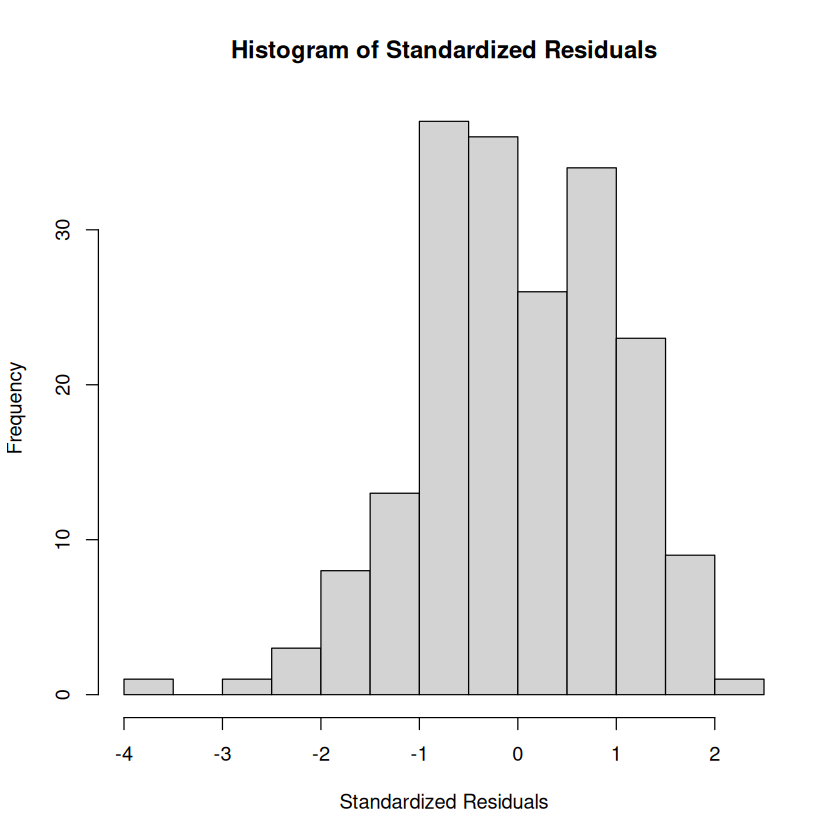

In [7]:
# Vẽ Q-Q plot để kiểm tra tính chuẩn của residuals
qqnorm(standardized_residuals)
qqline(standardized_residuals, col = "red")

# Vẽ histogram của standardized residuals
hist(standardized_residuals, breaks = 20, main = "Histogram of Standardized Residuals", xlab = "Standardized Residuals")

(d) Construct and interpret the time series plot of the standardized residuals from
part (c). Be sure to use proper plotting symbols to check on seasonality in the
standardized residuals.
(e) Use least squares to fit a seasonal-means plus quadratic time trend to the beer
sales time series. Interpret the regression output. Save the standardized residu-
als from the fit for further analysis.
(f) Construct and interpret the time series plot of the standardized residuals from
part (e). Again use proper plotting symbols to check for any remaining sea-
sonality in the residuals.

# Exercise 7. 

# Exercise 8. 

# Exercise 9.


(a) Hiển thị và diễn giải biểu đồ chuỗi thời gian

Đầu tiên, chúng ta cần tải dữ liệu và hiển thị biểu đồ chuỗi thời gian để tìm kiếm dấu hiệu của mùa vụ.

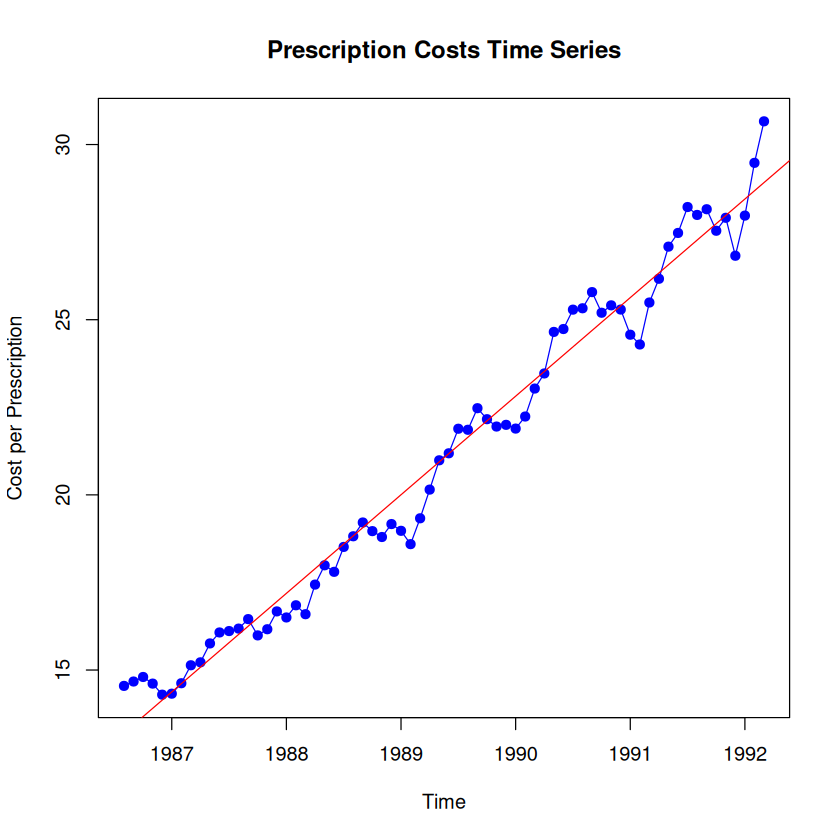

In [2]:
# Cài đặt package TSA (nếu chưa có)
# if (!require(TSA)) install.packages("TSA")

# Load thư viện và dữ liệu
library(TSA)
data(prescrip)

# (a) Vẽ biểu đồ chuỗi thời gian
plot(prescrip, type = "o", pch = 19, col = "blue",
     main = "Prescription Costs Time Series",
     ylab = "Cost per Prescription", xlab = "Time")

# Đặt một đường xu hướng nếu cần để quan sát sự thay đổi chung
abline(reg = lm(prescrip ~ time(prescrip)), col = "red")

Giải thích:
- **Dữ liệu:** Dữ liệu là chi phí theo từng tháng từ tháng 8/1986 đến tháng 3/1992.
- **Biểu đồ chuỗi thời gian:** Sử dụng `plot()` với `type = "o"` để vẽ biểu đồ đường với các điểm đại diện cho từng tháng, giúp dễ dàng nhận biết xu hướng.
- **Quan sát xu hướng:** Chúng ta có thể sử dụng đường xu hướng để xem liệu chi phí có xu hướng tăng, giảm hay ổn định theo thời gian.
- **Tìm kiếm mùa vụ:** Các dấu hiệu của mùa vụ có thể được phát hiện nếu có mẫu lặp lại trong các tháng nhất định hàng năm.

(b) Tính và vẽ sự thay đổi phần trăm giữa các tháng

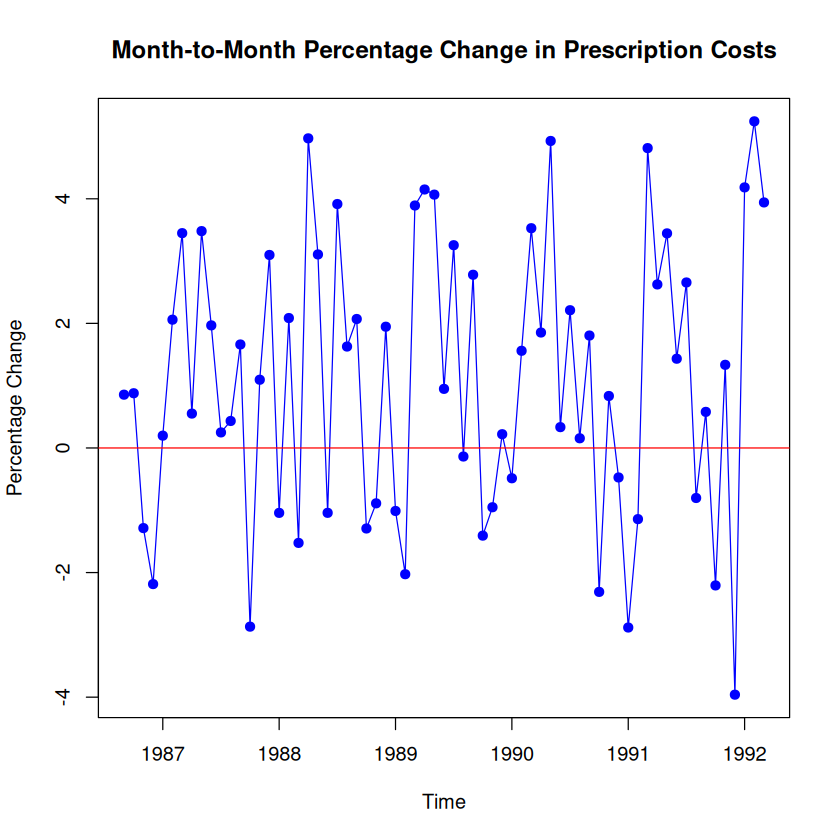

In [3]:
# (b) Tính sự thay đổi phần trăm giữa các tháng
pct_change <- diff(log(prescrip)) * 100

# Vẽ biểu đồ sự thay đổi phần trăm giữa các tháng
plot(pct_change, type = "o", pch = 19, col = "blue",
     main = "Month-to-Month Percentage Change in Prescription Costs",
     ylab = "Percentage Change", xlab = "Time")

# Đặt một đường xu hướng nếu cần
abline(h = 0, col = "red")

Giải thích:
- **Tính phần trăm thay đổi:** Sử dụng `diff(log(prescrip)) * 100` để tính sự thay đổi phần trăm giữa các tháng. Điều này giúp chuyển sự thay đổi giá trị thành tỷ lệ thay đổi phần trăm.
- **Biểu đồ:** Sử dụng `plot()` để vẽ chuỗi thời gian của sự thay đổi phần trăm theo tháng. Chúng ta có thể kiểm tra các mẫu lặp lại và dấu hiệu mùa vụ thông qua biểu đồ này.

(c) Sử dụng bình phương tối thiểu để khớp xu hướng cosine


Call:
lm(formula = pct_change ~ cos(2 * pi * time_values/12) + sin(2 * 
    pi * time_values/12))

Residuals:
    Min      1Q  Median      3Q     Max 
-5.1549 -2.0098  0.1043  1.8211  4.0608 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)
(Intercept)                    0.9895     0.7430   1.332    0.188
cos(2 * pi * time_values/12)   0.1995     0.4536   0.440    0.662
sin(2 * pi * time_values/12)  -0.1416     0.9938  -0.143    0.887

Residual standard error: 2.265 on 64 degrees of freedom
Multiple R-squared:  0.003036,	Adjusted R-squared:  -0.02812 
F-statistic: 0.09745 on 2 and 64 DF,  p-value: 0.9073


1            2            3            4            5            6 
 0.002401051  0.009004226 -0.996471450 -1.410364297 -0.316352562  0.531102681 
           7            8            9           10           11           12 
 1.157479365 -0.165910456  1.156754828  0.465445517 -0.315219780 -0.236733975 
          13           14           15           16           17           18 
 0.311065431 -1.729018801  0.046820669  0.940579611 -0.921074167  0.476446854 
          19           20           21           22           23           24 
-1.146206352  1.759718716  0.919937458 -0.943931889  1.274063507  0.243791210 
          25           26           27           28           29           30 
 0.438008461 -1.075527241 -0.898817902  0.370231299 -0.962350725 -1.422679637 
          31           32           33           34           35           36 
 1.233500550  1.345600580  1.305241311 -0.099809935  0.933819279 -0.594142599 
          37           38           39           40           41           42 
 0.714518803 -1.170005756 -0.967422733 -0.442865305 -0.762407581  0.154343150 
          43           44           45           46           47           48 
 1.035567477  0.282600495  1.660143116 -0.400857683  0.439639361 -0.482497437 
          49           50           51           52           53           54 
 0.256218644 -1.588658741 -0.179130968 -0.765843804 -1.847276916 -1.066483411 
          55           56           57           58           59           60 
 1.611809408  0.629196244  1.001249788  0.095158987  0.651388475 -0.916287543 
          61           62           63           64           65           66 
-0.287376477 -1.559222594  0.061635881 -2.373759423  1.384834944  1.887495648 
          67 
 1.292414462

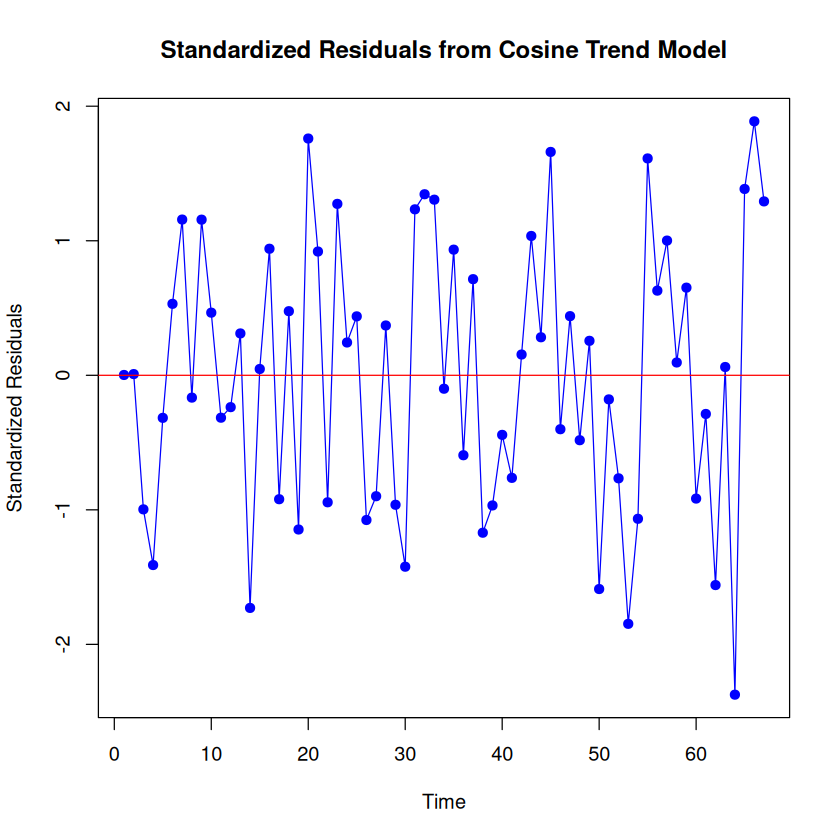

In [4]:
# (c) Khớp mô hình xu hướng cosine với tần số cơ bản 1/12
time_values <- time(prescrip)[-1]  # Loại bỏ phần tử đầu tiên do dùng diff()

# Mô hình cosine với tần số cơ bản
cosine_model <- lm(pct_change ~ cos(2 * pi * time_values / 12) + sin(2 * pi * time_values / 12))

# Kết quả mô hình
summary(cosine_model)

# Chuỗi dư chuẩn hóa
standardized_residuals <- rstandard(cosine_model)

# Lưu chuỗi dư
standardized_residuals

# Vẽ biểu đồ chuỗi dư
plot(standardized_residuals, type = "o", pch = 19, col = "blue",
     main = "Standardized Residuals from Cosine Trend Model",
     ylab = "Standardized Residuals", xlab = "Time")

# Đặt đường ngang y = 0
abline(h = 0, col = "red")

Giải thích:
- **Cosine model:** Khớp mô hình cosine với tần số cơ bản \(1/12\) để mô hình hóa chuỗi thời gian với chu kỳ hàng năm. Biểu thức cosine và sine được thêm vào như các biến độc lập trong mô hình hồi quy.
- **Kết quả mô hình:** Dùng `summary()` để xem kết quả hồi quy, bao gồm các hệ số của mô hình và kiểm định ý nghĩa thống kê.
- **Chuỗi dư:** Chuỗi dư được chuẩn hóa (standardized residuals) là phần dư của mô hình, được chuẩn hóa để có phương sai bằng 1. Điều này giúp dễ dàng kiểm tra sự phù hợp của mô hình và phát hiện những bất thường trong dữ liệu.